# Proyek Analisis Data: [E-Commerce-Public-Dataset]
- **Nama:** [Adnan Alamsyah]
- **Email:** [adnanalamsah71@gmail.com]
- **ID Dicoding:** [adnan_alamsyah_42xK]

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara persebaran seller dengan customer berdasarkan negara bagian?
- Customer negara bagian manakah yang paling sering berbelanja?

## Import Semua Packages/Library yang Digunakan

In [1]:
#input all of the libaary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [5]:
#import data sellers
sellers_df = pd.read_csv("/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [6]:
#import data orders
orders_df = pd.read_csv("/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
#import data customers
customers_df = pd.read_csv("/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data

In [8]:
#take the info of customers data
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
#trying to find the duplication data in the file
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
#describe the data
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [12]:
#take info about the orders data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
#find the missing data of the orders data
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
#print the duplicaton status of the data
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [15]:
#find the information about the sellers data
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [16]:
#find the information about the sellers data
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [17]:
#find the duplication of the data
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Data orders should be clean


### Cleaning Data

In [18]:
#find the duplicates data about the customers
customers_df.drop_duplicates(inplace=True)

In [19]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
#change the format of the datatypes
datetime_columns = ["order_approved_at", "order_delivered_carrier_date","order_delivered_customer_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])


In [21]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


In [22]:
min_datetime = orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].min().min()
max_datetime = orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].max().max()

In [23]:
random_datetimes_approved = pd.to_datetime(np.random.uniform(min_datetime.value, max_datetime.value, size=orders_df['order_approved_at'].isnull().sum()))
random_datetimes_carrier = pd.to_datetime(np.random.uniform(min_datetime.value, max_datetime.value, size=orders_df['order_delivered_carrier_date'].isnull().sum()))
random_datetimes_customer = pd.to_datetime(np.random.uniform(min_datetime.value, max_datetime.value, size=orders_df['order_delivered_customer_date'].isnull().sum()))



In [24]:
orders_df['order_approved_at'].fillna(pd.Series(random_datetimes_approved, index=orders_df.index[orders_df['order_approved_at'].isnull()]), inplace=True)
orders_df['order_delivered_carrier_date'].fillna(pd.Series(random_datetimes_carrier, index=orders_df.index[orders_df['order_delivered_carrier_date'].isnull()]), inplace=True)
orders_df['order_delivered_customer_date'].fillna(pd.Series(random_datetimes_customer, index=orders_df.index[orders_df['order_delivered_customer_date'].isnull()]), inplace=True)

In [25]:
#check the data whether the data format already changes or not
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


In [26]:
#input the sellers data
sellers_df.drop_duplicates(inplace=True)

In [27]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [28]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

to answer question 1, we should find data about customer in the city or state and how frequent they purchase something

In [29]:
#describe the data
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [30]:
#then for the next step, we group the data by customer city and state
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [31]:
#next find the seller frequency and from the seller city and state, and according to the result of the code above it can be seen that the customer that frequent to shop are from Sao paulo.
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [32]:
#group the seller from state and city
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

In [33]:
#according to the code above, it can be seen that region that has most seller are from Sao Paulo or SP region
orders_df.describe(include="all")

<ipython-input-33-da853a638922>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-33-da853a638922>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
<ipython-input-33-da853a638922>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90893,82801,98629,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-12-02 00:26:45,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 13:23:00.861542656,2016-09-16 01:01:23.675870720,NaN
last,NaN,NaN,NaN,NaN,2018-10-13 18:44:10.473311744,2018-10-17 11:39:37.052949504,2018-10-17 13:22:46,NaN


In [34]:
#o answer question number 2, we should find the order by the customer id and order purchase time stamp
orders_df.groupby(by="customer_id").order_id.nunique().sort_values(ascending=False)
orders_df.groupby(by="order_purchase_timestamp").order_id.nunique().sort_values(ascending=False)

order_purchase_timestamp
2018-06-01 13:39:44    3
2018-07-28 13:11:22    3
2018-04-11 10:48:14    3
2018-08-02 12:06:09    3
2018-08-02 12:06:07    3
                      ..
2017-11-07 22:02:05    1
2017-11-07 21:58:38    1
2017-11-07 21:57:26    1
2017-11-07 21:50:08    1
2018-10-17 17:30:18    1
Name: order_id, Length: 98875, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

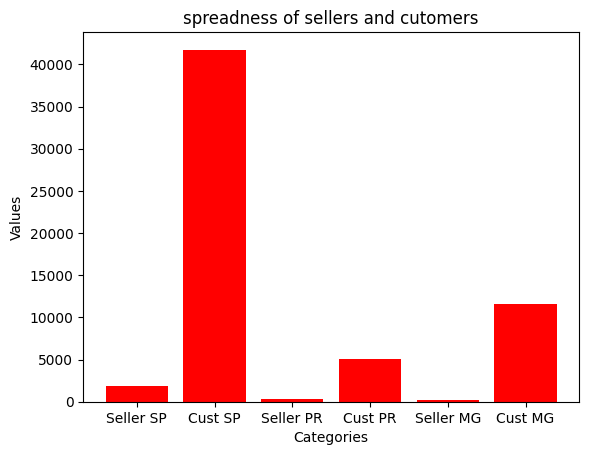

In [47]:
# Sample data
categories = ['Seller SP', 'Cust SP', 'Seller PR', 'Cust PR', 'Seller MG', 'Cust MG']
values = [1849, 41746, 349, 5045, 244, 11635]

# Create bar chart
plt.bar(categories, values, color='red')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('spreadness of sellers and cutomers')

# Show plot
plt.show()

according to the code and diagram above, it has been knwon that sau paulo has been chosen as the state that has biggest seller and customer for the e-commerce, but from this diagram it can be seen that the amount of customer is bigger than the seller

### Pertanyaan 2:

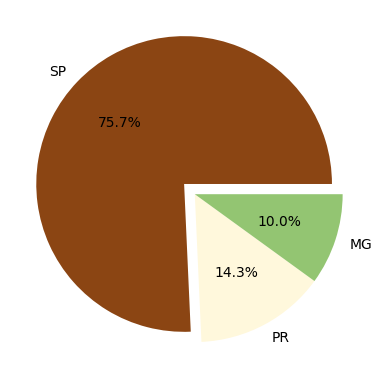

In [36]:
import matplotlib.pyplot as plt

state = ('SP', 'PR', 'MG')
votes = (1849, 349, 244)
colors = ('#8B4513', '#FFF8DC', '#93C572')  # Adjusted colors tuple length to match the number of states
explode = (0.1, 0, 0)  # Keeping explode as it is since it matches the number of states

plt.pie(
    x=votes,
    labels=state,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()


according to the code above it can be seen that the state that has biggest amount of seller is SP or sau paulo with the value of 75% of the total population

## Conclusion

- Conclution pertanyaan 1
according to the code and diagram above, it has been knwon that sau paulo has been chosen as the state that has biggest seller and customer for the e-commerce, but from this diagram it can be seen that the amount of customer is bigger than the seller
- Conclution pertanyaan 2
according to the code above it can be seen that the state that has biggest amount of seller is SP

In [ ]:
customers_df.to_csv('customers_df_new.csv', index=False)
orders_df.to_csv('orders_df_new.csv',  index=False)
sellers_df.to_csv('sellers_df_new.csv', index=False)